In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("D:\Python_Codes\Pandas\Train.csv")
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
new_df = df[["Item_MRP","Item_Outlet_Sales"]]

In [4]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(new_df)

In [5]:
scaled_df=pd.DataFrame(scaled_df)

Text(0, 0.5, 'Outlet Sales')

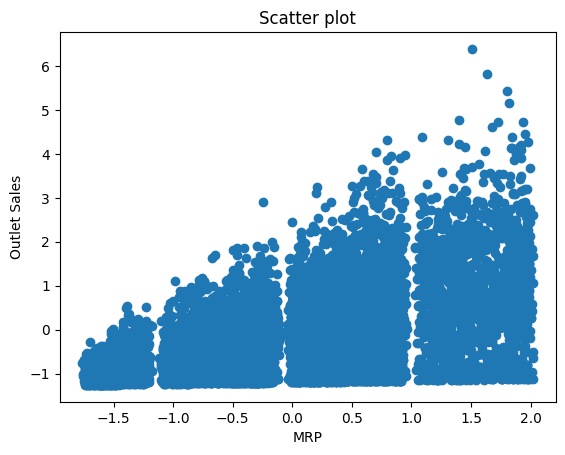

In [6]:
plt.scatter(scaled_df[0],scaled_df[1])
plt.title("Scatter plot")
plt.xlabel("MRP")
plt.ylabel("Outlet Sales")

In [7]:
inertia_lst = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init = "k-means++")
    kmeans.fit(scaled_df)
    inertia_lst.append(kmeans.inertia_)

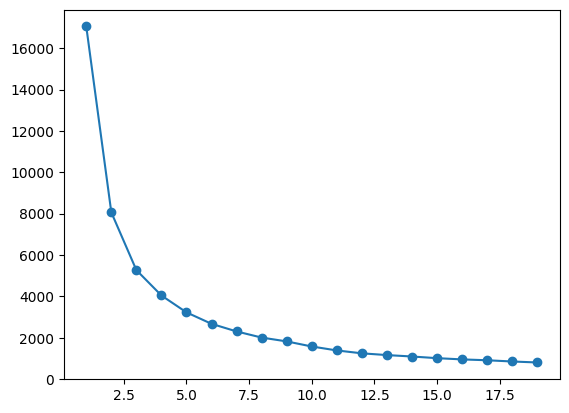

In [15]:
plt.plot(range(1,20), inertia_lst, marker = 'o')
plt.show()

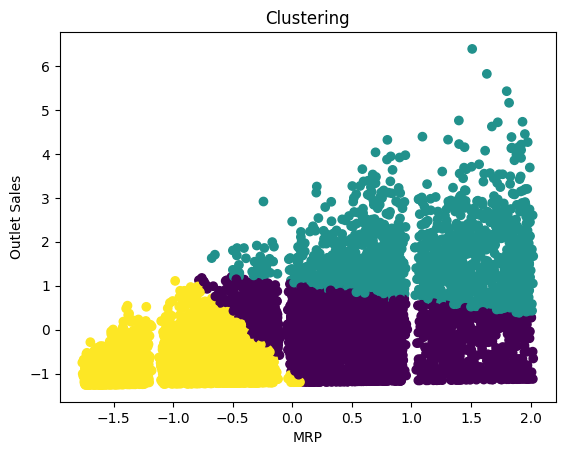

In [32]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(scaled_df)

plt.scatter(scaled_df[0],scaled_df[1], c=kmeans.labels_)
plt.title("Clustering")
plt.xlabel("MRP")
plt.ylabel("Outlet Sales")
plt.show()

In [33]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_df, kmeans.labels_ , metric = 'euclidean')

0.40787392563849734